In [1]:
import sys
import os
import re

import codecs
import string

from collections import Counter, OrderedDict

In [2]:
import json
from flask import Flask, request, redirect, url_for, send_from_directory
from werkzeug import secure_filename
from flask import jsonify, render_template, make_response

import numpy as np
import pandas as pd

In [3]:
import six

In [4]:
from backend import return_tables, table_to_df

In [75]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load data

In [6]:
txt_path = "testcases/test_input4.txt"
tabledict = return_tables(txt_path)
pass

In [7]:
table_to_df(list(tabledict.items())[0][1])

,Maturity Date (October 1),Principal Amount,Interest Rate,Yield,CUSIP†
0,2015,"775,000",2.000,0.100,13048TTV5
1,2016,"1,575,000",2.000,0.300,13048TTW3
2,2017,"1,620,000",3.000,0.660,13048TTX1
3,2018,"1,675,000",4.000,0.930,13048TTY9
4,2019,"2,045,000",5.000,1.150,13048TTZ6
5,2020,"2,155,000",5.000,1.320,13048TUA9
6,2021,"2,250,000",4.000,1.520,13048TUB7
7,2022,"2,610,000",5.000,1.670,13048TUC5
8,2023,"2,730,000",4.000,1.810,13048TUD3
9,2024,"2,875,000",5.000,1.920,13048TUE1


In [86]:
liteClient =  connect_to_retina()

"get json entry for one table"
vv = list(tabledict.values())[0]

table_text = text_from_table(vv)
liteClient.getFingerprint( table_text.encode('ascii', 'ignore')   )

[1,
 3,
 7,
 11,
 33,
 34,
 60,
 61,
 70,
 75,
 77,
 78,
 86,
 101,
 102,
 120,
 122,
 123,
 125,
 128,
 129,
 156,
 163,
 196,
 210,
 212,
 213,
 220,
 255,
 271,
 279,
 284,
 300,
 315,
 319,
 323,
 360,
 361,
 377,
 380,
 385,
 389,
 392,
 398,
 407,
 424,
 428,
 435,
 451,
 488,
 514,
 563,
 564,
 619,
 641,
 650,
 656,
 663,
 687,
 716,
 722,
 747,
 755,
 764,
 768,
 778,
 780,
 783,
 784,
 786,
 812,
 836,
 880,
 891,
 900,
 901,
 905,
 910,
 925,
 939,
 940,
 964,
 966,
 978,
 1013,
 1044,
 1055,
 1141,
 1146,
 1159,
 1212,
 1224,
 1269,
 1270,
 1281,
 1282,
 1283,
 1288,
 1289,
 1302,
 1317,
 1332,
 1351,
 1357,
 1361,
 1399,
 1400,
 1409,
 1438,
 1445,
 1474,
 1530,
 1553,
 1603,
 1642,
 1654,
 1679,
 1683,
 1685,
 1695,
 1700,
 1735,
 1763,
 1768,
 1772,
 1773,
 1774,
 1785,
 1791,
 1822,
 1823,
 1830,
 1845,
 1858,
 1860,
 1892,
 1901,
 1944,
 1945,
 1949,
 1976,
 1985,
 2019,
 2020,
 2021,
 2023,
 2026,
 2027,
 2031,
 2051,
 2060,
 2070,
 2101,
 2106,
 2115,
 2146,
 2147,
 

In [8]:
from collections import OrderedDict

In [78]:
from semantic_processing import get_footprint_of_tables, text_from_table, connect_to_retina

In [28]:
for kk, vv in six.iteritems(tabledict):
    print(kk, text_from_table(vv), sep = "\t")

10	  Maturity Date    (October 1)  Principal Amount  Interest Rate  Yield  CUSIP†  58,205,000 Serial Bonds | MATURITY SCHEDULE | (City of Anaheim Water System Project) 13048TTV513048TTW313048TTX113048TTY913048TTZ613048TUA913048TUB713048TUC513048TUD313048TUE12.030(c) 13048TUF82.200(c) 13048TUG62.320(c) 13048TUH42.450(c) 13048TUJ02.520(c) 13048TUK72.600(c) 13048TUL53.140(c) 13048TUM33.190(c) 13048TUN13.230(c) 13048TUP63.270(c) 13048TUQ4


In [29]:
import os

try:  
    os.environ["RETINA_SDK_KEY"]
except KeyError: 
    print( "Please set the environment variable RETINA_SDK_KEY")

In [88]:
for kk, vv in get_footprint_of_tables(tabledict):
    #print(kk, vv, sep = "\t")
    pass
vv

[1,
 3,
 7,
 11,
 33,
 34,
 60,
 61,
 70,
 75,
 77,
 78,
 86,
 101,
 102,
 120,
 122,
 123,
 125,
 128,
 129,
 156,
 163,
 196,
 210,
 212,
 213,
 220,
 255,
 271,
 279,
 284,
 300,
 315,
 319,
 323,
 360,
 361,
 377,
 380,
 385,
 389,
 392,
 398,
 407,
 424,
 428,
 435,
 451,
 488,
 514,
 563,
 564,
 619,
 641,
 650,
 656,
 663,
 687,
 716,
 722,
 747,
 755,
 764,
 768,
 778,
 780,
 783,
 784,
 786,
 812,
 836,
 880,
 891,
 900,
 901,
 905,
 910,
 925,
 939,
 940,
 964,
 966,
 978,
 1013,
 1044,
 1055,
 1141,
 1146,
 1159,
 1212,
 1224,
 1269,
 1270,
 1281,
 1282,
 1283,
 1288,
 1289,
 1302,
 1317,
 1332,
 1351,
 1357,
 1361,
 1399,
 1400,
 1409,
 1438,
 1445,
 1474,
 1530,
 1553,
 1603,
 1642,
 1654,
 1679,
 1683,
 1685,
 1695,
 1700,
 1735,
 1763,
 1768,
 1772,
 1773,
 1774,
 1785,
 1791,
 1822,
 1823,
 1830,
 1845,
 1858,
 1860,
 1892,
 1901,
 1944,
 1945,
 1949,
 1976,
 1985,
 2019,
 2020,
 2021,
 2023,
 2026,
 2027,
 2031,
 2051,
 2060,
 2070,
 2101,
 2106,
 2115,
 2146,
 2147,
 

In [36]:
vv

{'begin_line': 10,
 'captions': ['  Maturity Date    (October 1) ',
  'Principal Amount ',
  'Interest Rate ',
  'Yield ',
  'CUSIP† '],
 'data': [[{'leftover': ('', ''),
    'start': 7,
    'subtype': 'year',
    'type': 'integer',
    'value': '2015'},
   {'leftover': ('', ''),
    'start': 30,
    'subtype': 'dollar',
    'type': 'large_num',
    'value': '775,000'},
   {'leftover': ('', '%'),
    'start': 54,
    'subtype': 'rate',
    'type': 'small_float',
    'value': '2.000'},
   {'leftover': ('', '%'),
    'start': 79,
    'subtype': 'rate',
    'type': 'small_float',
    'value': '0.100'},
   {'leftover': ('', ''),
    'start': 98,
    'subtype': 'none',
    'type': 'other',
    'value': '13048TTV5'}],
  [{'leftover': ('', ''),
    'start': 7,
    'subtype': 'year',
    'type': 'integer',
    'value': '2016'},
   {'leftover': ('', ''),
    'start': 29,
    'subtype': 'none',
    'type': 'large_num',
    'value': '1,575,000'},
   {'leftover': ('', ''),
    'start': 54,
    'su

In [38]:
fullClient = connect_to_retina( full = True)
img = fullClient.getImages(json.dumps([{"text": text_from_table(vv)}] ) )

In [61]:
imgdata = img[0].image_data
type(imgdata)

str

In [56]:
if str(type(s)) == "<class 'bytes'>":
    # only possible in Python 3
    s = s.decode('ascii')  # or  s = str(s)[2:-1]
elif str(type(s)) == "<type 'unicode'>":
    # only possible in Python 2
    s = str(s)
    
six.binary_type(img[0].image_data)

TypeError: string argument without an encoding

In [68]:
outimg = "test.png"
with open(outimg, "wb+") as ff:
    ff.write(bytes(imgdata,  'ascii'))

In [70]:
%ls

backend.py*          pd*                      static/
bower.json*          Procfile*                string*
codecs*              project/                 sys*
deploy_notebook.sh*  __pycache__/             TableParser4.ipynb*
deprecated/          re*                      templates/
design/              README.md*               testcases/
EXAMPLES.md*         requirements.txt*        test.png*
json*                retina-sdk.py/           test.py*
manifest.yml*        semantic_processing.py*  test_semantic_processing.ipynb*
np*                  server.py*               test_semantic_processing.py*
os*                  server.py.bak*


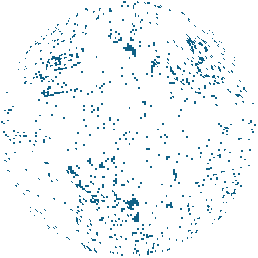

In [50]:
from IPython.display import Image
Image(data = img[0].image_data)